In [1]:
import pandas as pd


df = pd.read_csv("globalterrorismdb_0718dist", encoding='latin1', low_memory=False)

df.replace(-9, pd.NA, inplace=True)


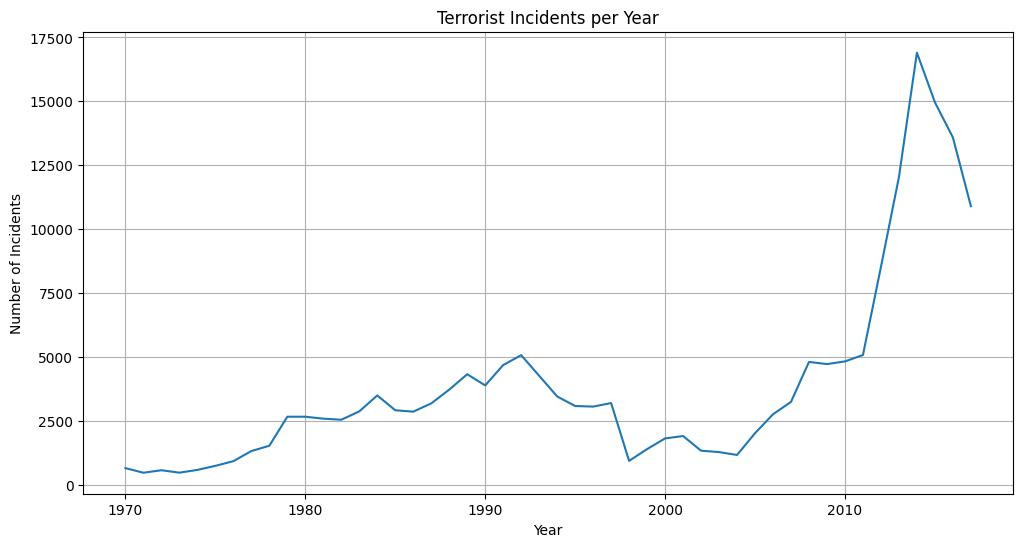

In [ ]:
import matplotlib.pyplot as plt


yearly = df.groupby("iyear").size()

plt.figure(figsize=(12, 6))
yearly.plot()
plt.title("Terrorist Incidents per Year")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.grid(True)
plt.show()


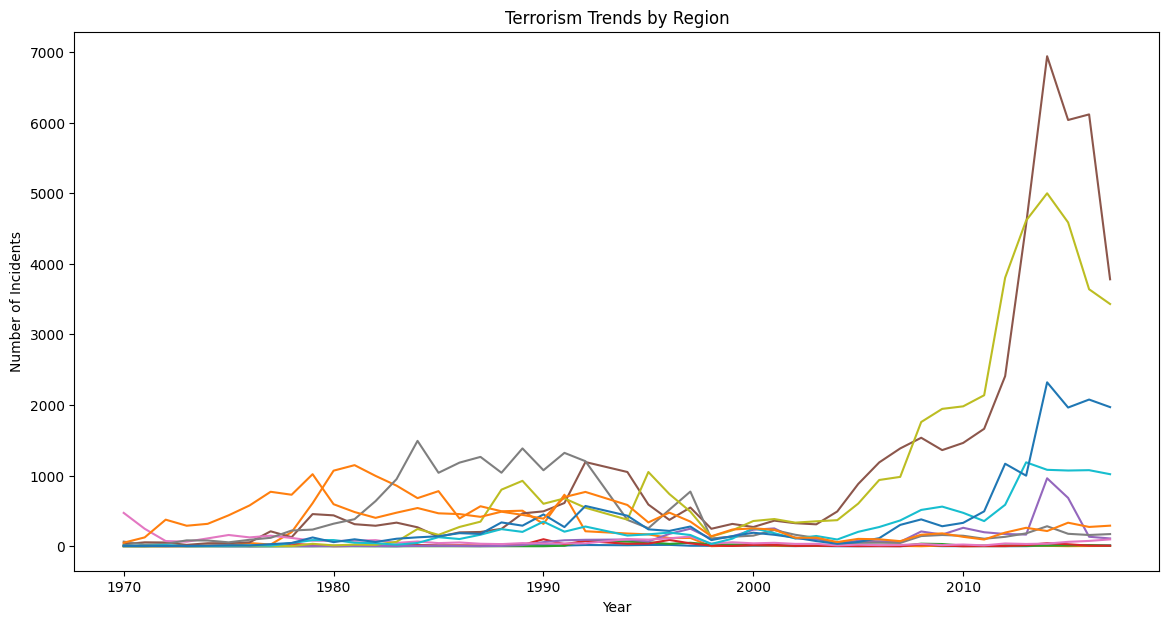

In [3]:
region_trends = df.groupby(["iyear", "region_txt"]).size().unstack().fillna(0)
region_trends.plot(figsize=(14, 7), legend=False)
plt.title("Terrorism Trends by Region")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()


Text(7.125000000000009, 0.5, 'Number of Fatalities')

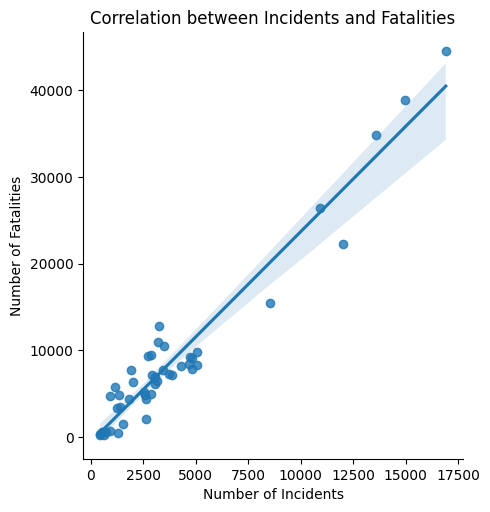

In [ ]:
import seaborn as sns


casualties_by_year = df.groupby("iyear")[["nkill"]].sum()
casualties_by_year["incidents"] = df.groupby("iyear").size()

sns.lmplot(x="incidents", y="nkill", data=casualties_by_year.reset_index())
plt.title("Correlation between Incidents and Fatalities")
plt.xlabel("Number of Incidents")
plt.ylabel("Number of Fatalities")


<Axes: title={'center': 'Top 10 Attack Types'}, xlabel='attacktype1_txt'>

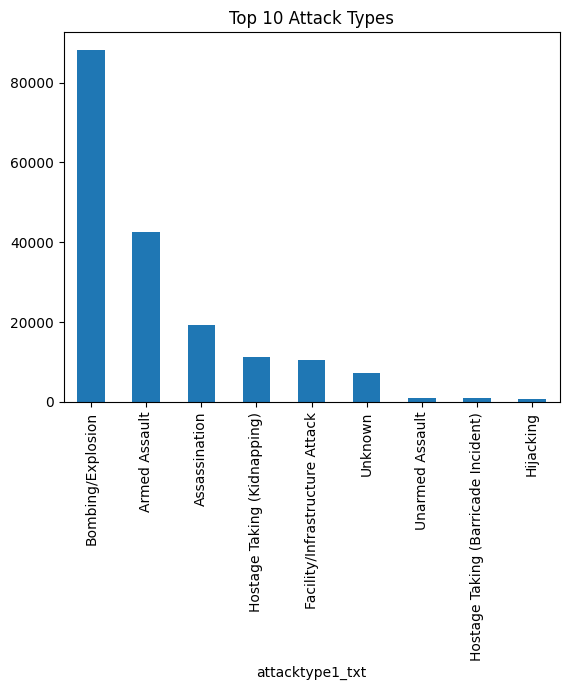

In [ ]:

attack_counts = df["attacktype1_txt"].value_counts().head(10)
attack_counts.plot(kind="bar", title="Top 10 Attack Types")


Text(0.5, 1.0, 'Attack Types by Region (Normalized)')

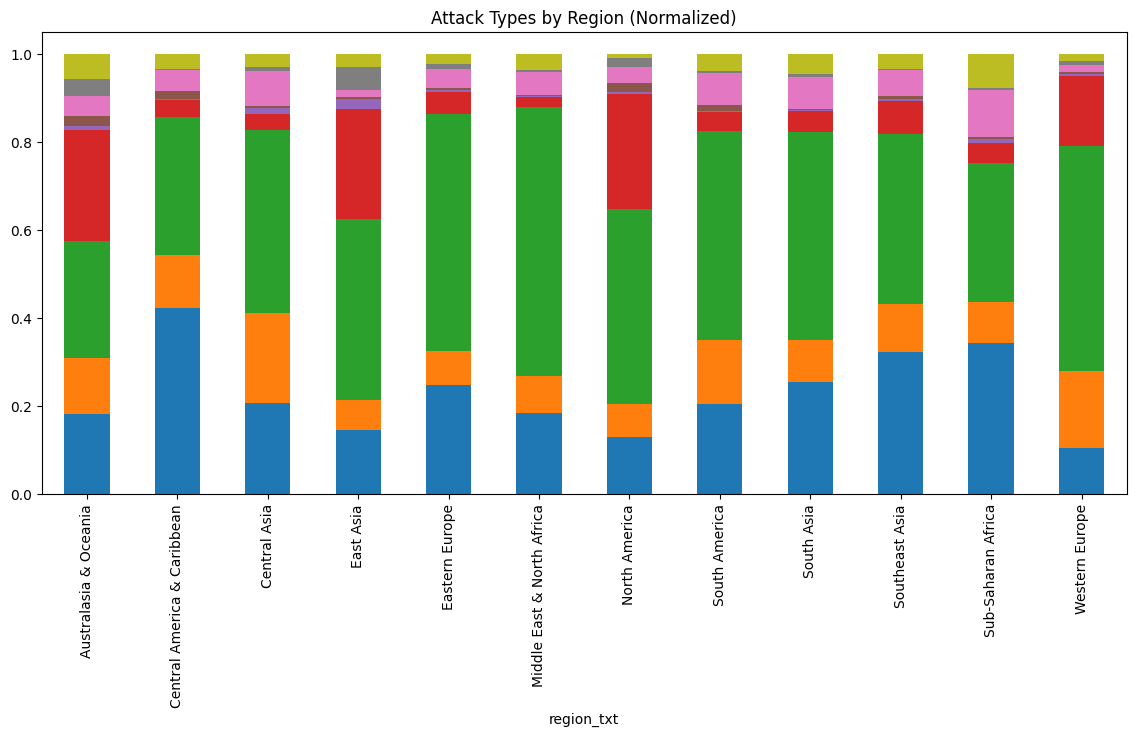

In [6]:
region_attack = df.groupby(["region_txt", "attacktype1_txt"]).size().unstack(fill_value=0)
region_attack = region_attack.div(region_attack.sum(axis=1), axis=0)  # Normalize
region_attack.plot(kind="bar", stacked=True, figsize=(14, 6), legend=False)
plt.title("Attack Types by Region (Normalized)")


In [ ]:
import folium


m = folium.Map(location=[20, 0], zoom_start=2)

for _, row in df.dropna(subset=["latitude", "longitude"]).sample(500).iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.4
    ).add_to(m)

m.save("terrorism_map.html")


<Axes: xlabel='gname'>

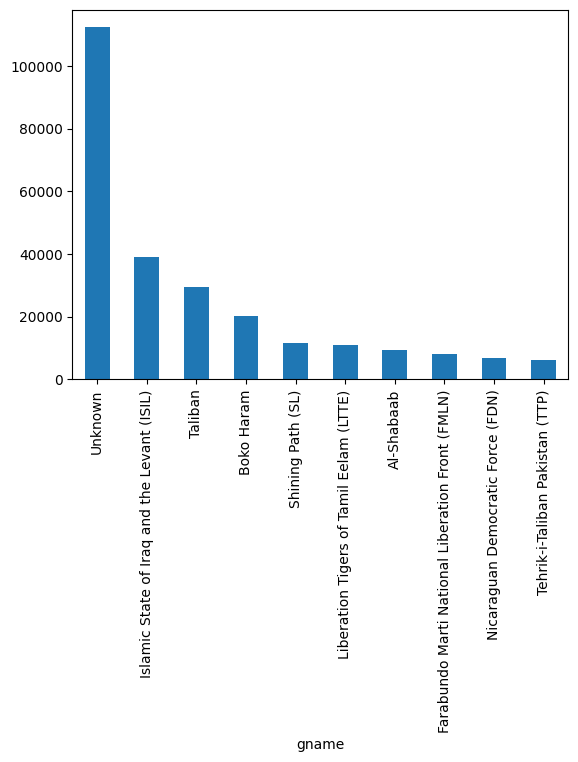

In [8]:
df.groupby("gname")["nkill"].sum().sort_values(ascending=False).head(10).plot(kind="bar")


<Axes: title={'center': 'Suicide Attacks Over Time'}, xlabel='iyear'>

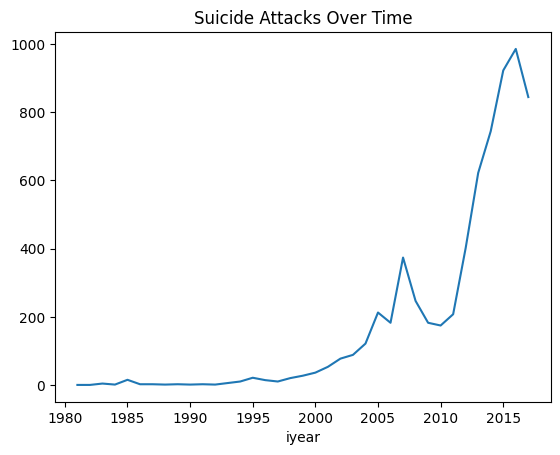

In [9]:
df[df["suicide"] == 1].groupby("iyear").size().plot(title="Suicide Attacks Over Time")
